Dominant spatial frequency (in pixel domain): 8.49 cycles/image


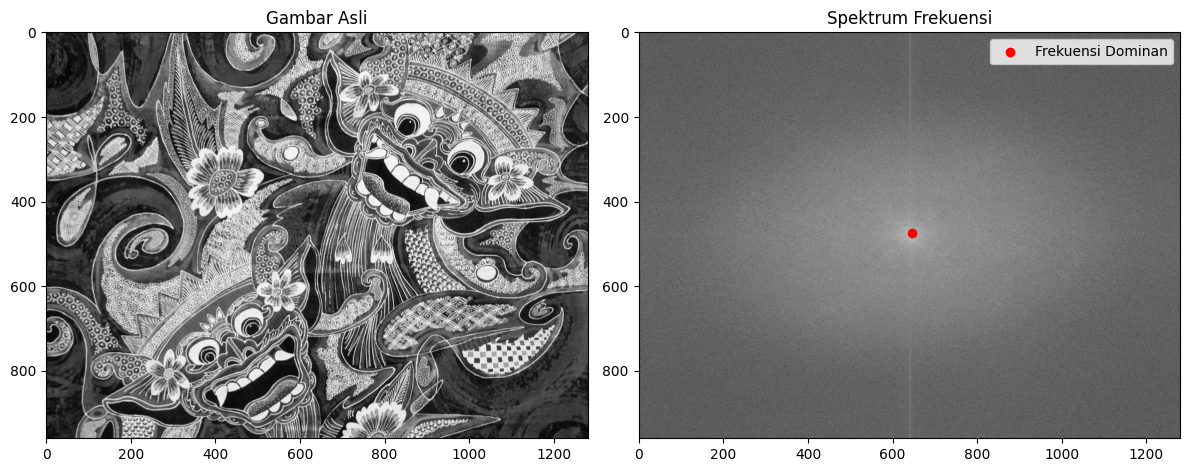

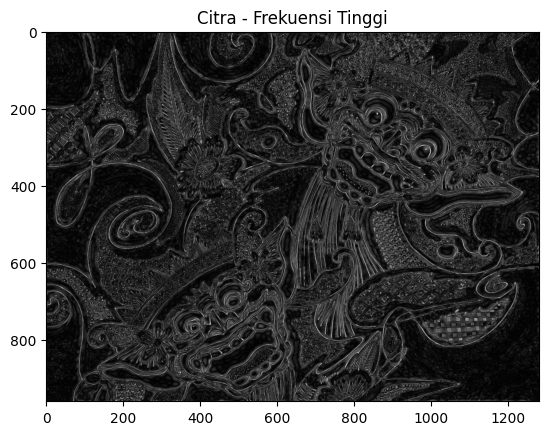

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, fftshift
from numpy.fft import ifft2, ifftshift
import cv2

# Baca dan ubah ke grayscale
img = cv2.imread("data/batik.jpg", cv2.IMREAD_GRAYSCALE)

# Ukuran gambar
h, w = img.shape

# FFT dan shift ke tengah
f = fft2(img)
fshift = fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# Cari lokasi frekuensi dominan (selain pusat)
center = (h // 2, w // 2)
magnitude_no_center = magnitude_spectrum.copy()
magnitude_no_center[center[0]-5:center[0]+5, center[1]-5:center[1]+5] = 0  # hilangkan pusat

max_loc = np.unravel_index(np.argmax(magnitude_no_center), magnitude_no_center.shape)
freq_y = max_loc[0] - center[0]
freq_x = max_loc[1] - center[1]

# Hitung frekuensi spasial dominan
freq_dom = np.sqrt(freq_x**2 + freq_y**2)
print(f"Dominant spatial frequency (in pixel domain): {freq_dom:.2f} cycles/image")

# Visualisasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.scatter([max_loc[1]], [max_loc[0]], color='red', label='Frekuensi Dominan')
plt.title('Spektrum Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

# Filter Frekuensi Tinggi (High Pass)
mask = np.ones((h, w), np.uint8)
r = 50  # radius untuk frekuensi rendah
center = [int(h/2), int(w/2)]
cv2.circle(mask, (center[1], center[0]), r, 0, -1)  # nolkan frek. rendah

# Terapkan mask ke FFT
f_high = fshift * mask
img_high = np.abs(ifft2(ifftshift(f_high)))

# Tampilkan
plt.imshow(img_high, cmap='gray')
plt.title("Citra - Frekuensi Tinggi")
plt.show()
